In [304]:
#Guilherme Campino Grunewald
#Daniel de Souza Lima Jr
#1°Semestre ADS, Turma B

In [305]:
import pandas as pd
low_memory=False
import folium
from folium import plugins
from folium.plugins import HeatMap
from IPython.display import Image

In [306]:
file = 'Dados.csv' #todos os arquivos consolidado em um só

In [307]:
df = pd.read_csv(file,sep=';', encoding="latin-1")

#limpando alguns registros gerados na hora da consolidação
lista = [173,321,393,445,504,546,596,651,705,771,807,848,902,944,994,1076,1144]
df = df.drop(lista)

In [308]:
df = df.dropna(axis=0, how='any',subset=['NOMEPESSOA','LATITUDE','IDADE'], inplace=False)
df = df.drop_duplicates(subset='NOMEPESSOA',keep=False,inplace=False)

In [309]:
df_2018 = df[df.ANO_BO == '2018']

In [310]:
#'27/03/2018 14:31'#30/12/2018 06:35 #1° 539 #2°991
lista = []
for x in range(540,992):
    if x in df.index: lista.append(x)
df_tri = df.drop(lista)

In [311]:
print('df:',df.shape,'\ndf_2018:',df_2018.shape,'\ndf_tri:',df_tri.shape)

df: (306, 54) 
df_2018: (212, 54) 
df_tri: (142, 54)


In [312]:
df.describe()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
count,306,306,306,306,306,306,306,306,306,306,...,0.0,0.0,0.0,0.0,0.0,306,306,0.0,0.0,0.0
unique,3,275,287,296,296,240,5,236,296,3,...,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0
top,2018,258,548/2017,08/02/2017 06:42,08/02/2017 07:28,17/06/2018,A NOITE,22/05/2018,08/02/2017 06:42,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
freq,212,3,3,3,3,4,125,4,3,255,...,NaN,NaN,NaN,NaN,NaN,306,306,NaN,NaN,NaN


In [313]:
df_2018.describe()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
count,212,212,212,212,212,212,212,212,212,212,...,0.0,0.0,0.0,0.0,0.0,212,212,0.0,0.0,0.0
unique,1,201,201,207,207,165,5,161,207,3,...,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0
top,2018,258,258/2018,28/11/2018 00:41,16/06/2018 22:45,17/06/2018,A NOITE,22/05/2018,28/11/2018 00:41,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
freq,212,3,3,2,2,4,98,4,2,184,...,NaN,NaN,NaN,NaN,NaN,212,212,NaN,NaN,NaN


In [314]:
df_tri.describe()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
count,142,142,142,142,142,142,142,142,142,142,...,0.0,0.0,0.0,0.0,0.0,142,142,0.0,0.0,0.0
unique,3,124,133,137,137,117,5,116,137,3,...,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0
top,2019,51,548/2017,08/02/2017 06:42,08/02/2017 07:28,28/01/2019,A NOITE,28/01/2019,08/02/2017 06:42,Desconhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
freq,49,3,3,3,3,4,45,3,3,114,...,NaN,NaN,NaN,NaN,NaN,142,142,NaN,NaN,NaN


In [315]:
print(df.info())
print('----'*25)
print(df_2018.info())
print('----'*25)
print(df_tri.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 14 to 1219
Data columns (total 54 columns):
ANO_BO                      306 non-null object
NUM_BO                      306 non-null object
NUMERO_BOLETIM              306 non-null object
BO_INICIADO                 306 non-null object
BO_EMITIDO                  306 non-null object
DATAOCORRENCIA              306 non-null object
PERIDOOCORRENCIA            306 non-null object
DATACOMUNICACAO             306 non-null object
DATAELABORACAO              306 non-null object
BO_AUTORIA                  306 non-null object
FLAGRANTE                   306 non-null object
NUMERO_BOLETIM_PRINCIPAL    66 non-null object
LOGRADOURO                  306 non-null object
NUMERO                      306 non-null object
BAIRRO                      305 non-null object
CIDADE                      306 non-null object
UF                          306 non-null object
LATITUDE                    306 non-null object
LONGITUDE                   30

### Top 5 Cidades 

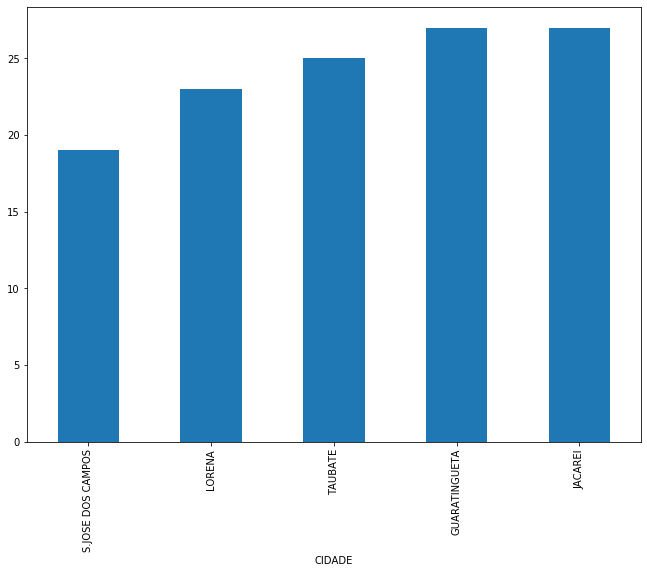

In [316]:
df_2018.groupby('CIDADE').size().sort_values().tail(5).plot(kind='bar', figsize=(11,8))

### Idade das Vítimas

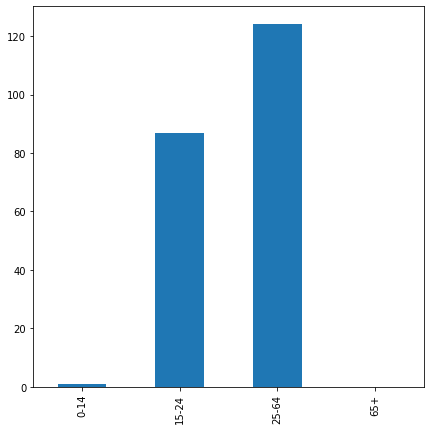

In [317]:
crianca = jovem = adulto = idoso = 0
for idade in df_2018.IDADE:
    if 0<=int(idade)<=14: crianca+=1
    elif 15<=int(idade)<=24: jovem+=1
    elif 25<=int(idade)<=64: adulto+=1
    elif int(idade)>=65: idoso+=1
        
df_idade = pd.Series({'0-14': crianca, '15-24': jovem, '25-64': adulto, '65+': idoso})
df_idade.plot(kind='bar',figsize=(7,7))

### Mapa de Calor, Usando Folium Python Heat Map

In [318]:
latitude = []
longitude = []

for k in df_2018.set_index("LATITUDE").index: latitude.append(float(k.replace(',','.')))
for k in df_2018.set_index("LONGITUDE").index: longitude.append(float(k.replace(',','.')))

In [319]:
map_hooray = folium.Map(location=[-22.991964,-45.4339687], zoom_start = 9.32)
listaheat = []
for i in range(len(latitude)):
    listaheat.append([latitude[i],longitude[i]])

In [320]:
HeatMap(listaheat).add_to(map_hooray)
map_hooray

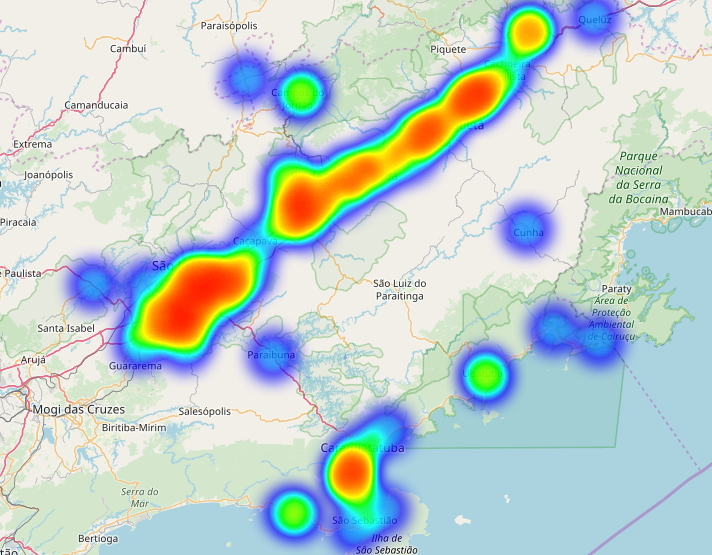

In [321]:
Image('img.png')

### Crescimento do Índice no Primeiro Trimestre de 2019

In [322]:
ano_2017 = ano_2018 = ano_2019 = 0
for x in df_tri.ANO_BO:
    if x == '2017':ano_2017+=1
    elif x == '2018':ano_2018+=1
    elif x == '2019':ano_2019+=1

df_ano = pd.Series({'2017': ano_2017, '2018': ano_2018, '2019': ano_2019})

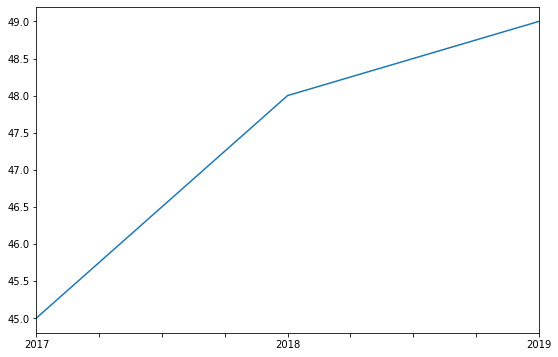

In [326]:
df_ano.plot(figsize=(9,6))